In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 256)       7168      
                                                                 
 activation (Activation)     (None, 62, 62, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       295040    
                                                                 
 activation_1 (Activation)   (None, 29, 29, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                   

<ipython-input-2-98ca932fbdf7>:59: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/25
210/210 [==============================] - 4268s 20s/step - loss: 1.4240 - accuracy: 0.5369 - val_loss: 0.6096 - val_accuracy: 0.7904
Epoch 2/25
210/210 [==============================] - 94s 447ms/step - loss: 0.7320 - accuracy: 0.7472 - val_loss: 0.4347 - val_accuracy: 0.8367
Epoch 3/25
210/210 [==============================] - 95s 451ms/step - loss: 0.5921 - accuracy: 0.7881 - val_loss: 0.4268 - val_accuracy: 0.8459
Epoch 4/25
210/210 [==============================] - 95s 451ms/step - loss: 0.5041 - accuracy: 0.8180 - val_loss: 0.3490 - val_accuracy: 0.8710
Epoch 5/25
210/210 [==============================] - 95s 455ms/step - loss: 0.4534 - accuracy: 0.8344 - val_loss: 0.4034 - val_accuracy: 0.8505
Epoch 6/25
210/210 [==============================] - 95s 454ms/step - loss: 0.4207 - accuracy: 0.8511 - val_loss: 0.3138 - val_accuracy: 0.8827
Epoch 7/25
210/210 [==============================] - 85s 407ms/step - loss: 0.3806 - accuracy: 0.8633 - val_loss: 0.2888 - val_ac

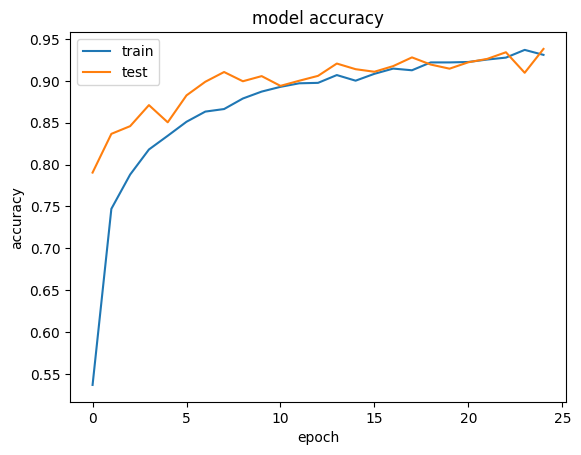

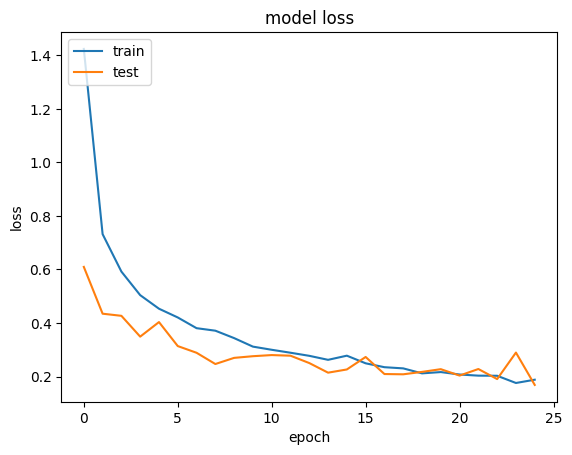

6815.955850362778


In [2]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf
import keras

start = time.time()
img_width, img_height = 64,64

train_data_dir = '/content/drive/MyDrive/5.combine/dataset/train'
validation_data_dir = '/content/drive/MyDrive/5.combine/dataset/test'
nb_train_samples = 13500
nb_validation_samples = 3276
epochs =25
batch_size = 64


input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size, class_mode ='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size =(img_width, img_height),
                                                        batch_size = batch_size, class_mode ='categorical', shuffle=False)

history = model.fit_generator(train_generator,
        steps_per_epoch = nb_train_samples // batch_size,
        epochs = epochs, validation_data = validation_generator,
        validation_steps = nb_validation_samples // batch_size)

model.save_weights('model_saved.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight',
                'Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                'Potato___Early_blight','Potato___healthy','Potato___Late_blight','Tomato__Tomato_YellowLeaf__Curl_Virus',
                'Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-3-f78b7dc95479>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[ 95   1  15   0   0   0   0   0   2   0   0   0   0   0   0]
 [  0 235   0   0   0   0   0   0   0   0   0   0   2   0   0]
 [ 39   0 149   1   0   0   0   0   0   0   0   0   6   0   0]
 [  0   0   0 230   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   0 218   7   4   3   0   0   0   1   2   0   0]
 [  0   0   0   0   5  69   3   0   0   0   0   0   1   1   0]
 [  0   0   0   0   1   0 212   0   0   0   0   1   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 198   0   0   1   1   0   0]
 [  0   0   0   0   0   0   0   0   8 183   2   0   6   0   1]
 [  0   0   0   0   0   0   0   0   0   2  27   0   0   0   1]
 [  0   0   0   0   0   0   1   0   0   1   0 171  19   4   4]
 [  0   0   0   0   1   1   0   1  10   7   0  26 332   1   2]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0 638   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0 317]]
Classification Report
               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


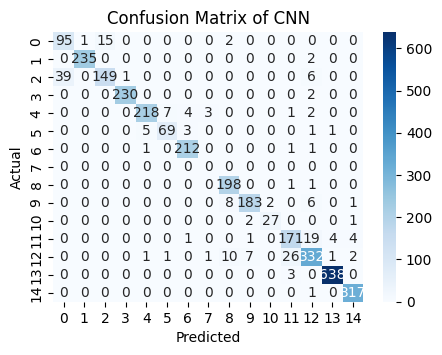

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_CNN.png')

# Show the plot
plt.show()

densenet201

74836368/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                122944    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 18445903 (70.37 MB)
Trainable params: 18216

<ipython-input-1-c80d43203830>:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/25
210/210 [==============================] - 131s 479ms/step - loss: 2.1724 - accuracy: 0.3430 - val_loss: 1.2837 - val_accuracy: 0.6780
Epoch 2/25
210/210 [==============================] - 91s 434ms/step - loss: 1.3224 - accuracy: 0.6001 - val_loss: 0.7349 - val_accuracy: 0.7996
Epoch 3/25
210/210 [==============================] - 92s 436ms/step - loss: 0.9424 - accuracy: 0.7053 - val_loss: 0.5091 - val_accuracy: 0.8453
Epoch 4/25
210/210 [==============================] - 91s 436ms/step - loss: 0.7702 - accuracy: 0.7574 - val_loss: 0.4153 - val_accuracy: 0.8624
Epoch 5/25
210/210 [==============================] - 92s 438ms/step - loss: 0.6426 - accuracy: 0.7970 - val_loss: 0.3547 - val_accuracy: 0.8824
Epoch 6/25
210/210 [==============================] - 91s 435ms/step - loss: 0.5347 - accuracy: 0.8283 - val_loss: 0.2891 - val_accuracy: 0.8971
Epoch 7/25
210/210 [==============================] - 91s 434ms/step - loss: 0.4873 - accuracy: 0.8420 - val_loss: 0.2711 - val_a

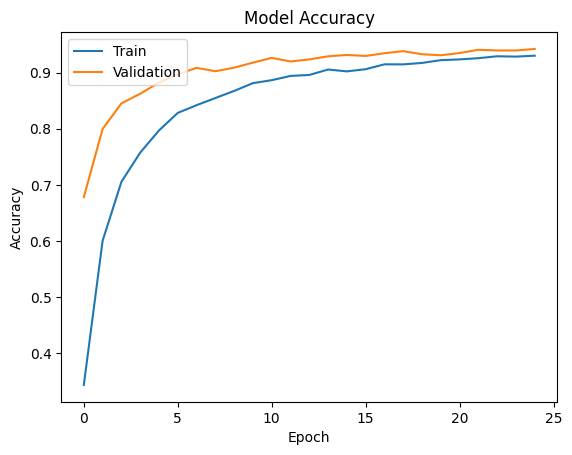

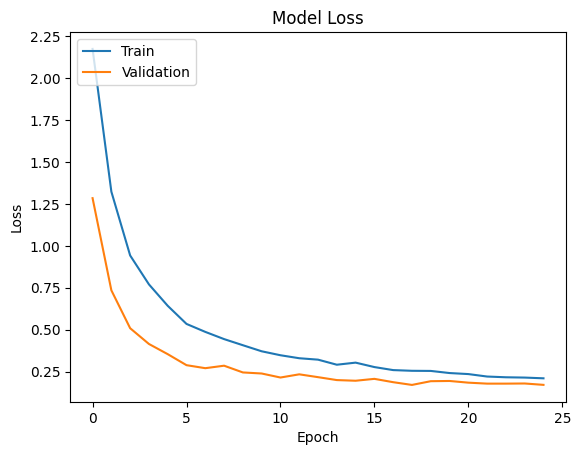

Total time taken: 2500.07 seconds


In [1]:
# Importing necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import DenseNet201
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import time

# Start time
start = time.time()

# Image dimensions
img_width, img_height = 64,64

train_data_dir = '/content/drive/MyDrive/5.combine/dataset/train'
validation_data_dir = '/content/drive/MyDrive/5.combine/dataset/test'
nb_train_samples = 13500
nb_validation_samples = 3276
epochs =25
batch_size = 64

# Base model - DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Build model architecture
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

# Summary of the model architecture
model.summary()

# Freeze layers in base model
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze last 20 layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile the model with a reduced learning rate
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

# Generate training and validation data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        shuffle=False)

# Train the model
history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

# Save the model weights
model.save_weights('model_densenet201_finetuned.h5')

# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_densenet201_finetuned.png')
plt.show()

# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_densenet201_finetuned.png')
plt.show()

# End time
end = time.time()
print("Total time taken: {:.2f} seconds".format(end - start))


classification report

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight',
                'Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                'Potato___Early_blight','Potato___healthy','Potato___Late_blight','Tomato__Tomato_YellowLeaf__Curl_Virus',
                'Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-2-f78b7dc95479>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[100   0  12   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0 237   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 23   0 168   1   0   0   0   0   0   0   0   0   3   0   0]
 [  0   0   2 230   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 196  24   7   8   0   0   0   0   0   0   0]
 [  0   0   0   0   7  72   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 213   1   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 197   1   0   0   0   0   2]
 [  0   0   0   0   0   0   0   0   4 190   3   1   0   0   2]
 [  0   0   0   0   0   0   0   0   0   0  30   0   0   0   0]
 [  0   0   0   0   0   1   1   1   0   4   0 153  18   5  17]
 [  0   0   0   0   0   0   2   0   4  14   1   5 351   1   3]
 [  0   0   0   0   0   0   1   0   0   2   1   1   0 633   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 318]]
Classification Report
               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix

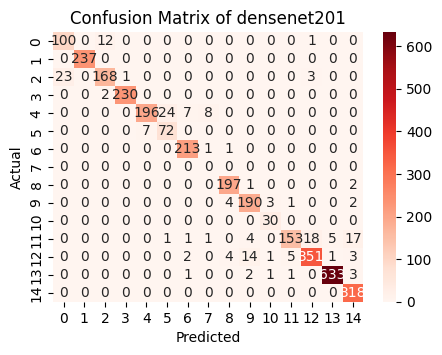

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Reds', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of densenet201')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_densenet201.png')

# Show the plot
plt.show()

CNN_SVM_hybrid

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 activation (Activation)     (None, 62, 62, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                   

<ipython-input-1-89a03d05edcb>:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/25
210/210 [==============================] - 3703s 18s/step - loss: 1.0577 - accuracy: 0.4847 - val_loss: 1.0091 - val_accuracy: 0.6936
Epoch 2/25
210/210 [==============================] - 146s 695ms/step - loss: 1.0078 - accuracy: 0.7079 - val_loss: 0.9903 - val_accuracy: 0.7862
Epoch 3/25
210/210 [==============================] - 146s 693ms/step - loss: 0.9923 - accuracy: 0.7702 - val_loss: 0.9825 - val_accuracy: 0.8110
Epoch 4/25
210/210 [==============================] - 147s 700ms/step - loss: 0.9855 - accuracy: 0.7999 - val_loss: 0.9758 - val_accuracy: 0.8364
Epoch 5/25
210/210 [==============================] - 148s 706ms/step - loss: 0.9796 - accuracy: 0.8242 - val_loss: 0.9741 - val_accuracy: 0.8404
Epoch 6/25
210/210 [==============================] - 147s 702ms/step - loss: 0.9762 - accuracy: 0.8360 - val_loss: 0.9683 - val_accuracy: 0.8683
Epoch 7/25
210/210 [==============================] - 149s 708ms/step - loss: 0.9734 - accuracy: 0.8490 - val_loss: 0.9672 - 

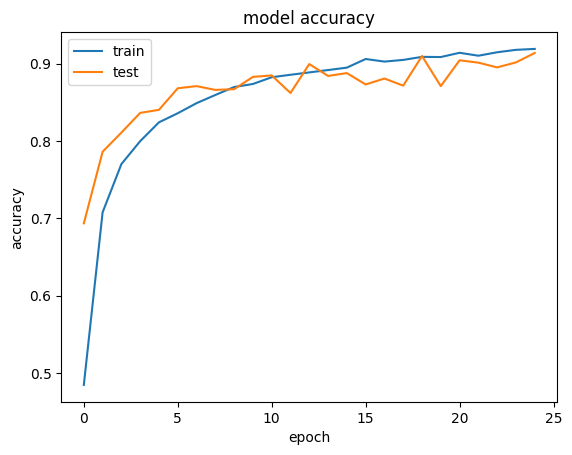

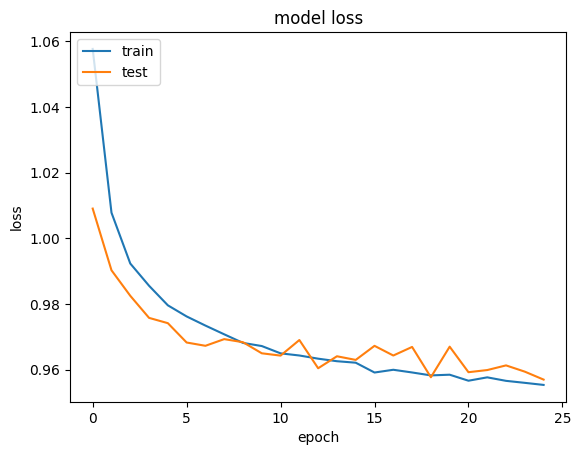

8020.899017095566


In [1]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras import backend as K
from matplotlib import pyplot as plt
import time
import numpy as np
import tensorflow as tf
import keras
from sklearn.metrics import classification_report, confusion_matrix
start = time.time()

img_width, img_height = 64,64

train_data_dir = '/content/drive/MyDrive/5.combine/dataset/train'
validation_data_dir = '/content/drive/MyDrive/5.combine/dataset/test'
nb_train_samples = 13500
nb_validation_samples = 3276
epochs =25
batch_size = 64

train_datagen = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

input_shape = (img_width, img_height, 3)
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#CNN_SVM layer
model.add(Dense(15, kernel_regularizer=tf.keras.regularizers.l2(0.0001),activation='softmax'))
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'squared_hinge', metrics = ['accuracy'])

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size, class_mode ='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size =(img_width, img_height),
                                                        batch_size = batch_size, class_mode ='categorical',
                                                        shuffle=False)

history = model.fit_generator(train_generator,
        steps_per_epoch = nb_train_samples // batch_size,
        epochs = epochs, validation_data = validation_generator,
        validation_steps = nb_validation_samples // batch_size)

model.save_weights('model_cnnsvm.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('cnnsvmaccuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('cnnsvmloss')
plt.show()
end = time.time()
print(end - start)

CLASSIFICATION REPORT


In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight',
                'Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                'Potato___Early_blight','Potato___healthy','Potato___Late_blight','Tomato__Tomato_YellowLeaf__Curl_Virus',
                'Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-2-f78b7dc95479>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[ 92   1  14   0   0   0   0   0   0   0   0   0   5   0   1]
 [  1 232   0   1   0   0   0   0   0   0   0   0   3   0   0]
 [ 14   0 170   1   0   0   0   0   1   0   0   0   9   0   0]
 [  0   0   0 232   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 226   0   1   0   1   0   0   4   3   0   0]
 [  0   0   0   0  62   0   1   0   0   0   0  12   4   0   0]
 [  0   0   0   0   1   0 212   0   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 194   1   0   0   2   0   3]
 [  0   0   0   0   0   0   0   0   4 174   0   6  16   0   0]
 [  0   0   0   0   0   0   0   5   0  21   0   1   2   0   1]
 [  1   0   0   0   0   0   0   0   0   0   0 168  24   2   5]
 [  2   0   0   0   0   0   1   0   2   6   0  21 345   2   2]
 [  0   0   0   1   0   0   0   0   0   0   0   5   2 633   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0 317]]
Classification Report
               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

CONFUSION MATRIX

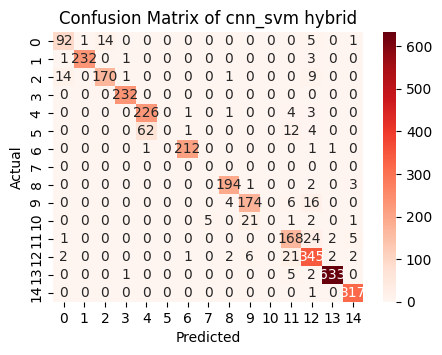

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Reds', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of cnn_svm hybrid')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_cnn_svm hybrid.png')

# Show the plot
plt.show()